In [63]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as scs

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

font = {'size'   : 14}
matplotlib.rc('font', **font)

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

all_data = pd.read_csv('', low_memory=False)


In [65]:
all_data.head(8)

,Price,Make,Milage,Year,Body_Sytle,City,State
0,380000.0,Lamborghini,3800,2018,Convertible,New York,NY
1,181995.0,Audi,93,2018,Convertible,New York,NY
2,4400.0,Subaru,153736,2010,Sedan,New York,NY
3,82000.0,Cadillac,16100,2019,SUV,New York,NY
4,51500.0,Land Rover,16000,2018,SUV,New York,NY
5,34567.0,Tesla,49000,2017,Sedan,New York,NY
6,70000.0,BMW,7400,2017,Sedan,New York,NY
7,16899.0,BMW,63000,2013,Sedan,New York,NY


In [66]:
#shuffling all the rows
all_data = all_data.sample(frac=1).reset_index(drop=True)

# taking the first 50k samples
sample = all_data.head(50000)

sample.to_csv('fiftyK.csv')

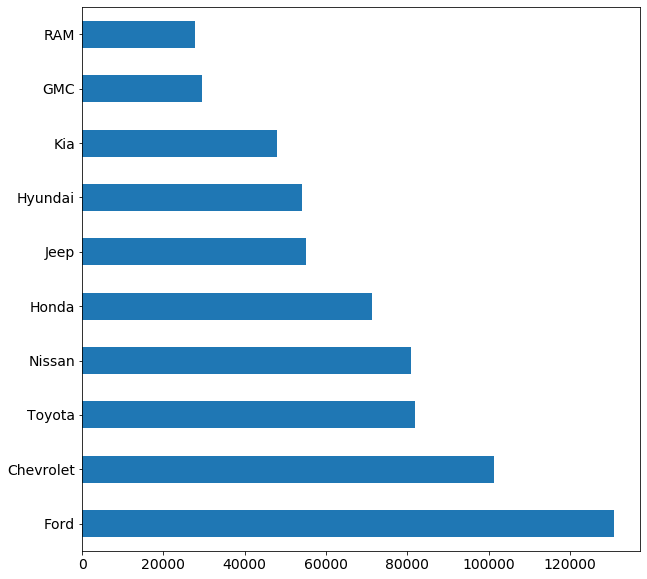

In [6]:
cars5['Make'].value_counts().head(10).plot(kind = 'barh', figsize = (10,10))

In [6]:
cars5['Model'].value_counts().head(10).plot(kind = 'barh', figsize = (10,10))

KeyError: 'Model'

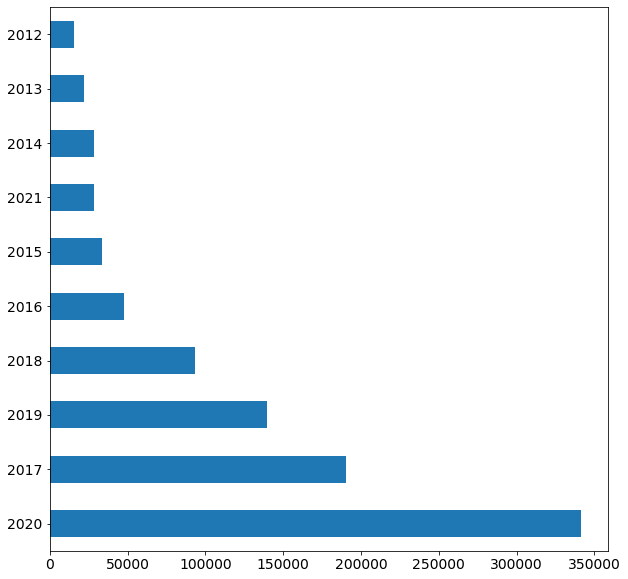

In [8]:
cars5['Year'].value_counts().head(10).plot(kind = 'barh', figsize = (10,10))

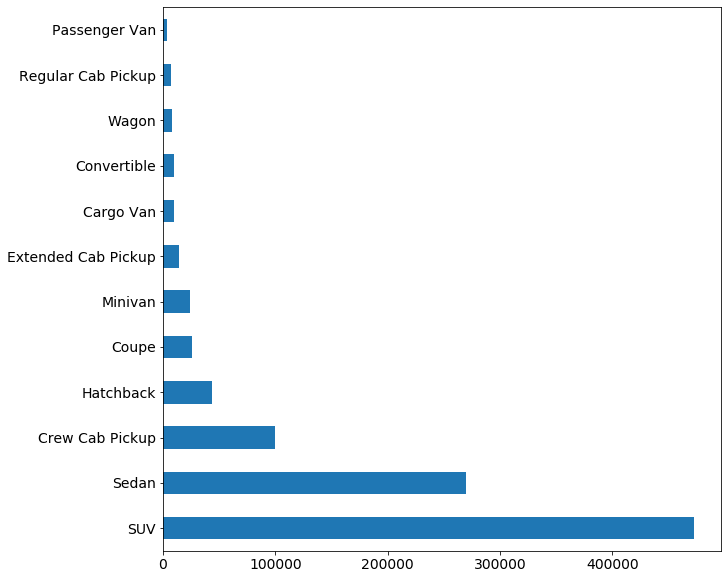

In [9]:
cars5['Body_Sytle'].value_counts().head(12).plot(kind = 'barh', figsize = (10,10))

I just want to see what a basic linear regression looks like before I move on GraidentBoosting and Random Forest Before that I need to get dummies for my catagorical data..

In [6]:
dummies = all_data.select_dtypes('object').columns
X = pd.get_dummies(all_data, columns = dummies, dummy_na = True, prefix=dummies)

y = all_data.pop('Price')

In [7]:
y.head()

0    380000.0
1    181995.0
2      4400.0
3     82000.0
4     51500.0
Name: Price, dtype: float64

# Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

linear = LinearRegression(normalize = True)

#Make	Model	Year	Body_Sytle	City


## I'm going to do a 85 train 20% test on my data
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.20)

In [42]:
## I think I should see a really good score...
model = linear.fit(X_train, y_train)
model.score(X_test, y_test)

0.9532890387334709

In [47]:
eval(model, X_test,y_test)

R2 of model: 0.95
RMSE of model: 238026496.96


15428.107368181838

# Ridge 

In [29]:
from sklearn.linear_model import Ridge
model2 = Ridge(alpha=1.0, normalize=True)

model2.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [48]:
# this is kind of crap....
eval(model2, X_test,y_test)

R2 of model: 0.66
RMSE of model: 1713087701.94


41389.46365857578

# Lasso


In [54]:
from sklearn import linear_model

lasso = linear_model.Lasso(alpha=0.1, normalize = True)

lasso.fit(X_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [55]:
eval(lasso, X_test,y_test)

R2 of model: 1.00
RMSE of model: 1576.71


39.70781064770589

# RandomForestRegressor

In [ ]:
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [59]:
rfr = RandomForestRegressor(max_depth=10, n_estimators=1000)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [60]:
eval(rfr, X_test,y_test)

R2 of model: 0.65
RMSE of model: 1785057407.53


42249.939734055035

# Decision Tree

In [61]:
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'

In [ ]:
eval(dt, X_test,y_test)

# GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor